# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import cartopy
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
#from eofs.xarray import Eof 

In [2]:
import cftime
import scipy

In [3]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import make_multisimulation_dataset

In [4]:
from load_ensembles import *
import quick_map

In [5]:
path_in='/glade/work/czarakas/coupled_PPE/data/data_for_figures/'

# Load data

In [6]:
from load_gridcell_areas import *

In [7]:
ds_Ts = xr.open_dataset(path_in+'annual_means/delta_TSKIN_Annual_mean_coupled.nc')['TSKIN']
pvals_Ts=xr.open_dataset(path_in+'annual_means/pval_TSKIN_Annual_mean_coupled.nc')['pval']

In [8]:
ds_P = xr.open_dataset(path_in+'annual_means/delta_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')['calculated_PREC_FROM_ATM']
pvals_P=xr.open_dataset(path_in+'annual_means/pval_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')['pval']

In [9]:
ds_ref_P=xr.open_dataset(path_in+'annual_means/ref_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')['calculated_PREC_FROM_ATM']
ds_ref_Ts=xr.open_dataset(path_in+'annual_means/ref_TSKIN_Annual_mean_coupled.nc')['TSKIN']

In [10]:
landweights2_atm=landweights2.reindex_like(ds_ref_P, method='nearest',tolerance=0.05)
landweights2_lnd=landweights2

# Do some calculations

In [11]:
val_range=ds_P.max(dim='ensemble_key')-ds_P.min(dim='ensemble_key')
val_range_mmyear=val_range*86400*365

In [32]:
val_range_pct=val_range*100/ds_ref_P

# Figure S11

In [12]:

sigmask=((pvals_P<=0.05).sum(dim='ensemble_key')<=5)

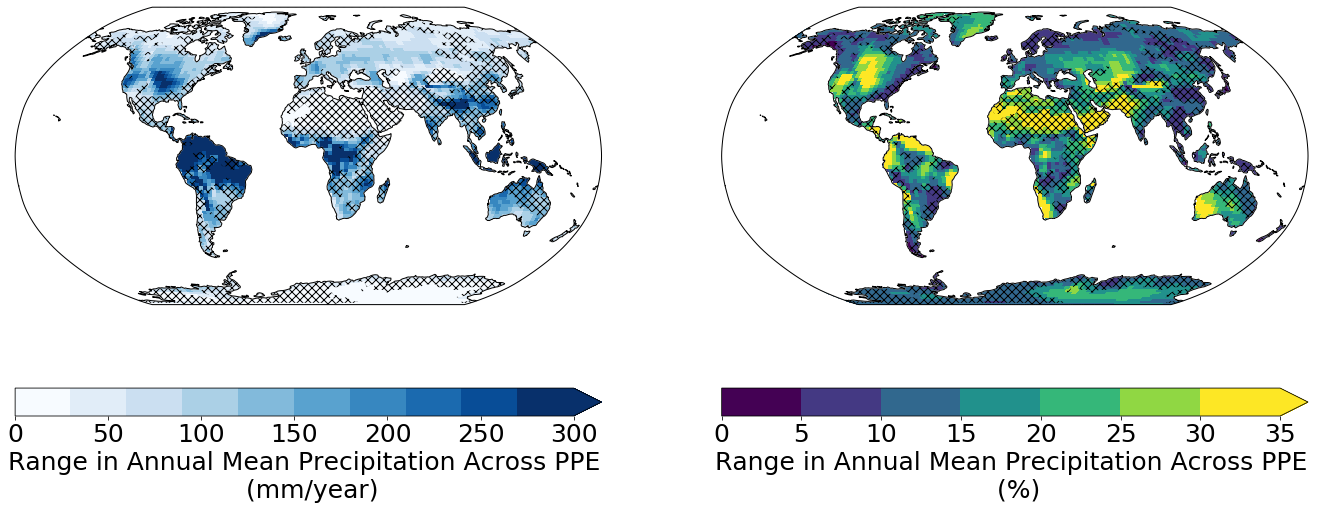

In [60]:
plt.rcParams.update({'font.size': 25})
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(figsize=(20,9),ncols=2, subplot_kw={'projection': ccrs.Robinson()})

#plt.subplot(1,2,1)
#ax2 = plt.axes(projection=ccrs.Robinson())
ax1.set_global()
mapdata=val_range_mmyear
cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=mapdata.lon)

im1=ax1.pcolormesh(cyclic_lons, mapdata.lat, #contourf
                   cyclic_data, 
                   cmap=plt.cm.get_cmap("Blues",10), vmin=0, vmax=300,#levels=np.arange(-100,100),
                   transform=ccrs.PlateCarree())
plt.colorbar(im1, extend='max', orientation='horizontal',ax=ax1,
            label='Range in Annual Mean Precipitation Across PPE \n (mm/year)')#, ticks=np.arange(-0.025, 0.030, 0.005))

cyclic_data_mask, cyclic_lons_mask = add_cyclic_point(sigmask, coord=sigmask.lon)
ax1.contourf(
            cyclic_lons_mask, sigmask.lat, cyclic_data_mask,
            transform=ccrs.PlateCarree(),
            colors='none',
            levels=[0.5, 1.5],
            hatches=['xxx'])
        
ax1.add_feature(cartopy.feature.OCEAN, facecolor='white', zorder=1)
ax1.coastlines()

#plt.subplot(1,2,2)
mapdata=val_range_pct
#ax = plt.axes(projection=ccrs.Robinson())
ax2.set_global()

cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=mapdata.lon)

im2=ax2.pcolormesh(cyclic_lons, mapdata.lat, #contourf
                   cyclic_data, 
                   cmap=plt.cm.get_cmap("viridis",7), vmin=0, vmax=35,#levels=np.arange(-100,100),
                   transform=ccrs.PlateCarree())
plt.colorbar(im2, extend='max', orientation='horizontal',ax=ax2,
            label='Range in Annual Mean Precipitation Across PPE \n (%)')#, ticks=np.arange(-0.025, 0.030, 0.005))
cyclic_data_mask, cyclic_lons_mask = add_cyclic_point(sigmask, coord=sigmask.lon)
ax2.contourf(
            cyclic_lons_mask, sigmask.lat, cyclic_data_mask,
            transform=ccrs.PlateCarree(),
            colors='none',
            levels=[0.5, 1.5],
            hatches=['xxx'])
        
plt.tight_layout()
ax2.add_feature(cartopy.feature.OCEAN, facecolor='white', zorder=1)
ax2.coastlines()
plt.savefig('Figures/PRECT_range_absolute_change.pdf')

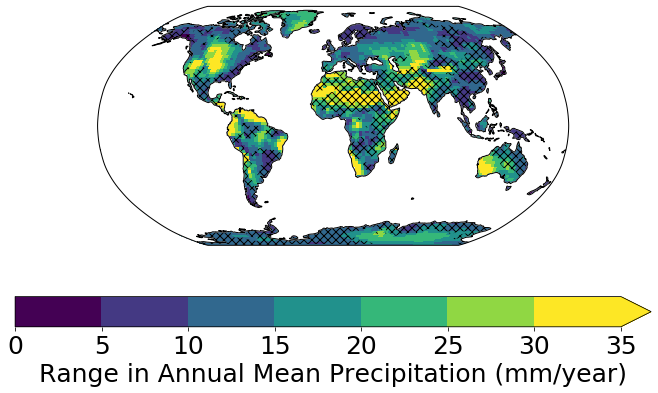

In [39]:

#plt.savefig('Figures/PRECT_range_absolute_change.pdf')

# Figure S9

In [14]:
pct_decrease_Ts=(((pvals_Ts<=0.05)&(ds_Ts<0))*landweights2).sum(dim=['lat','lon'])*100
pct_increase_Ts=(((pvals_Ts<=0.05)&(ds_Ts>0))*landweights2).sum(dim=['lat','lon'])*100
pct_decrease_P=(((pvals_P<=0.05)&(ds_P<0))*landweights2_atm).sum(dim=['lat','lon'])*100
pct_increase_P=(((pvals_P<=0.05)&(ds_P>0))*landweights2_atm).sum(dim=['lat','lon'])*100

In [15]:
from plotting_settings import *

In [16]:
zeta_ind=(crosswalk.param=='zetamaxstable').values

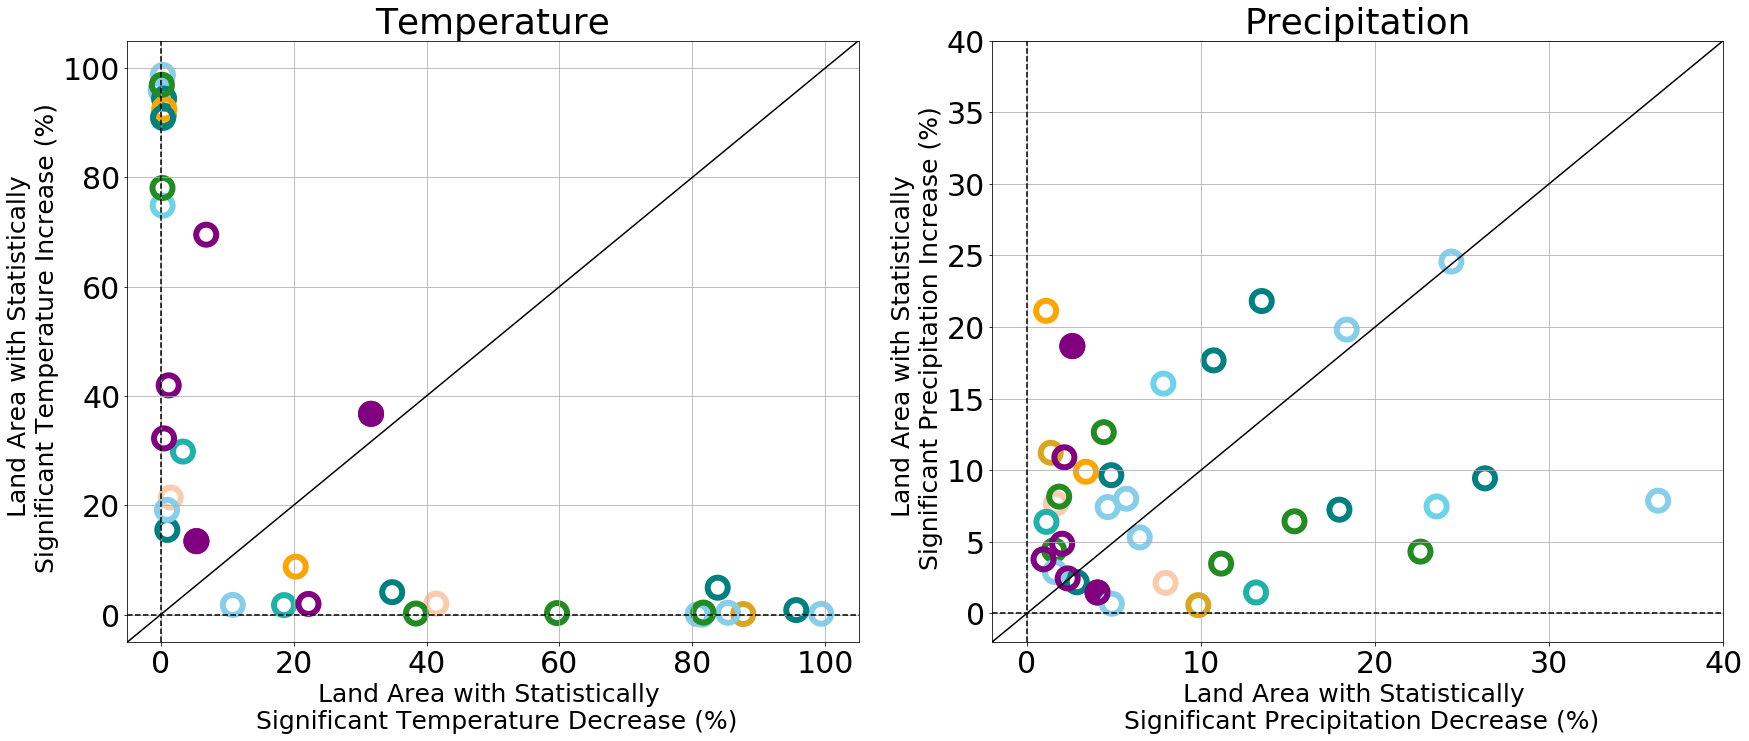

In [26]:
plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(25,11))

plt.subplot(1,2,1)
plt.scatter(pct_decrease_Ts[zeta_ind], pct_increase_Ts[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.scatter(pct_decrease_Ts, pct_increase_Ts, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('Land Area with Statistically \n Significant Temperature Decrease (%)', fontsize=25)
plt.ylabel('Land Area with Statistically \n Significant Temperature Increase (%)', fontsize=25)
plt.plot([-5,105],[-5,105],'-k')
plt.xlim([-5,105])
plt.ylim([-5,105])
plt.title('Temperature')

plt.subplot(1,2,2)


plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.scatter(pct_decrease_P[zeta_ind], pct_increase_P[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.scatter(pct_decrease_P, pct_increase_P, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.xlabel('Land Area with Statistically \n Significant Precipitation Decrease (%)', fontsize=25)
plt.ylabel('Land Area with Statistically \n Significant Precipitation Increase (%)', fontsize=25)
plt.plot([-2,40],[-2,40],'-k')
plt.xlim([-2,40])
plt.ylim([-2,40])
plt.title('Precipitation')
plt.tight_layout()
plt.savefig('Figures/Figure_S9_Percentage_Significant_Sign_Change.pdf')

# Figure S8

In [29]:
pct_change_Ts=(((pvals_Ts<=0.05))*landweights2).sum(dim=['lat','lon'])*100
pct_change_P=(((pvals_P<=0.05))*landweights2).sum(dim=['lat','lon'])*100

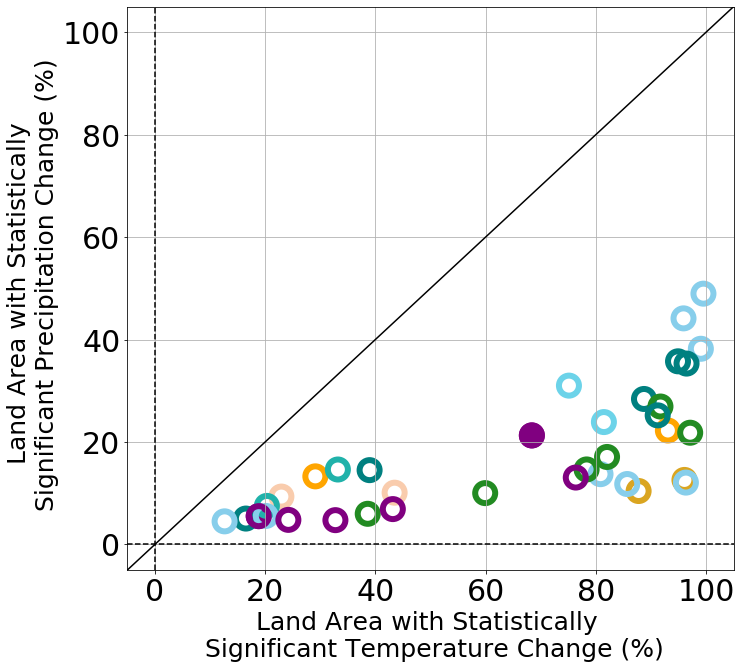

In [31]:
plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(11,10))

plt.scatter(pct_change_Ts[zeta_ind], pct_change_P[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.scatter(pct_change_Ts, pct_change_P, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('Land Area with Statistically \n Significant Temperature Change (%)',
          fontsize=25)
plt.ylabel('Land Area with Statistically \n Significant Precipitation Change (%)',
          fontsize=25)
plt.plot([-5,105],[-5,105],'-k')
plt.xlim([-5,105])
plt.ylim([-5,105])
plt.tight_layout()
plt.savefig('Figures/Figure_S8.pdf')